In [1]:
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv("dataset.csv")
print("Shape:", df.shape)
df.head()

Shape: (79330, 31)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


**timedelta()** function is generally used for calculating differences in dates and also can be used for date manipulation.

0    72138
1     7192
Name: ChangedRoom, dtype: int64


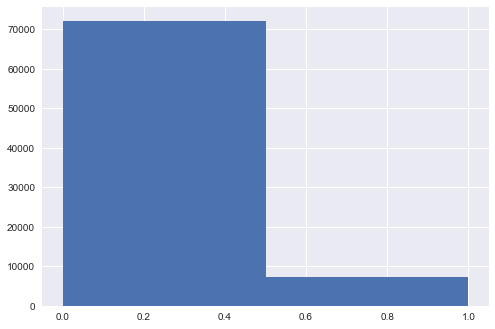

In [3]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# Changing 'LeadTime' column to float datatype.
df['LeadTime'] = df['LeadTime'].astype('float')

# Changing 'ReservationStatusDate' column to datetime64 datatype.
df['ReservationStatusDate'] = df['ReservationStatusDate'].astype('datetime64[ns]')
df['ArrivalDate'] = pd.to_datetime(df[['ArrivalDateYear','ArrivalDateMonth','ArrivalDateDayOfMonth']].astype(str).apply(' '.join, 1), format='%Y %B %d')
df['ReservationDate'] = [df.loc[i,'ArrivalDate'] - timedelta(days=df.loc[i,'LeadTime']) for i in df.index]

# Creating a new column 'ChangedRoom'.
df['ChangedRoom'] = 0

# Making ChangedRoom = 1 when ReservedRoomType & AssignedRoomType are same.
df['ChangedRoom'].where(df.ReservedRoomType == df.AssignedRoomType, 1, inplace=True)

print(df.ChangedRoom.value_counts())
df.ChangedRoom.hist(bins=2)
plt.show()

In [4]:
# Creating a new column 'TotalStay' using columns 'StaysInWeekendNights' & 'StaysInWeekNights'.
df['TotalStay'] = (df['StaysInWeekendNights'] + df['StaysInWeekNights']).astype('float')

# Creating a new column 'CheckOutDate' using columns 'ArrivalDate' & 'TotalStay'.
df['CheckOutDate'] = [df.loc[i, 'ArrivalDate'] + timedelta(days=df.loc[i,'TotalStay']) for i in df.index]

for x in df.index:

    if (df.loc[x,'CheckOutDate'] < df.loc[x,'ReservationStatusDate']) & (df.loc[x,'ReservationStatus'] == 'Check-Out'):
        df.loc[x, 'StayChanges'] = 'Extended'

    elif (df.loc[x,'CheckOutDate'] > df.loc[x,'ReservationStatusDate']) & (df.loc[x,'ReservationStatus'] == 'Check-Out'):
        df.loc[x, 'StayChanges'] = 'Early Check-Out'

    else:
        df.loc[x, 'StayChanges'] = 'No Changes'

**str.strip()** function is used to remove leading and trailing characters.

In [5]:
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

### Boxplots

IsCanceled                       1.0
LeadTime                       140.0
ArrivalDateYear                  1.0
ArrivalDateWeekNumber           21.0
ArrivalDateDayOfMonth           15.0
StaysInWeekendNights             2.0
StaysInWeekNights                2.0
Adults                           0.0
Children                         0.0
Babies                           0.0
IsRepeatedGuest                  0.0
PreviousCancellations            0.0
PreviousBookingsNotCanceled      0.0
BookingChanges                   0.0
DaysInWaitingList                0.0
ADR                             46.8
RequiredCarParkingSpaces         0.0
TotalOfSpecialRequests           1.0
ChangedRoom                      0.0
TotalStay                        2.0
dtype: float64


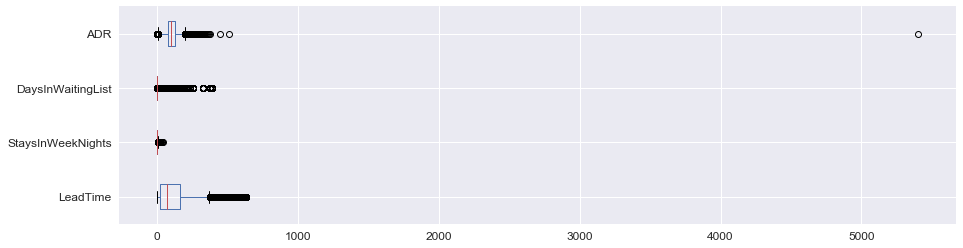

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Boxplot uses IQR
df[['LeadTime', 'StaysInWeekNights', 'DaysInWaitingList', 'ADR']].boxplot(grid=True, vert=False,
                                                                          fontsize=12, figsize=(15,4))
plt.show()

#### Removing outliers

IsCanceled                       1.0
LeadTime                       140.0
ArrivalDateYear                  1.0
ArrivalDateWeekNumber           21.0
ArrivalDateDayOfMonth           15.0
StaysInWeekendNights             2.0
StaysInWeekNights                2.0
Adults                           0.0
Children                         0.0
Babies                           0.0
IsRepeatedGuest                  0.0
PreviousCancellations            0.0
PreviousBookingsNotCanceled      0.0
BookingChanges                   0.0
DaysInWaitingList                0.0
ADR                             46.8
RequiredCarParkingSpaces         0.0
TotalOfSpecialRequests           1.0
ChangedRoom                      0.0
TotalStay                        2.0
dtype: float64


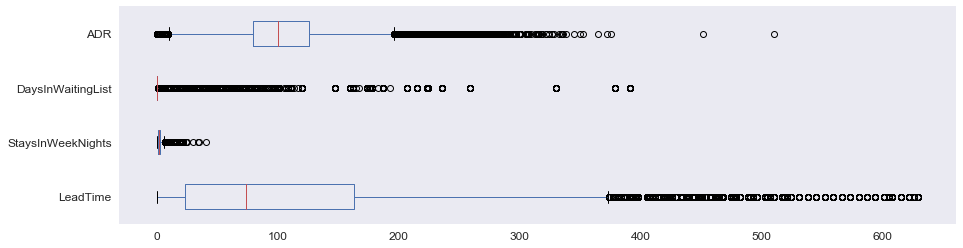

In [8]:
df = df[df['ADR'] < 1000]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df[['LeadTime', 'StaysInWeekNights', 'DaysInWaitingList', 'ADR']].boxplot(grid=False, vert=False,
                                                                          fontsize=12, figsize=(15,4))
plt.show()

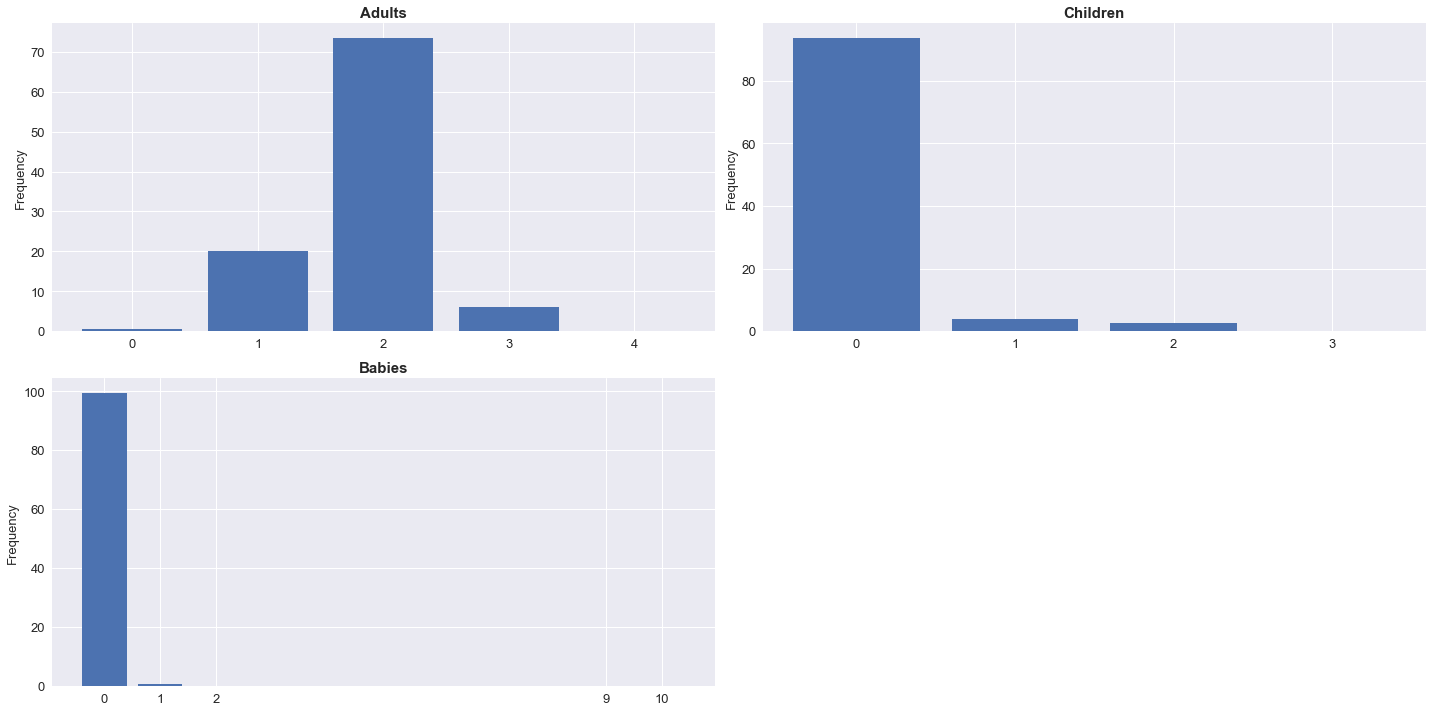

In [9]:
fig = plt.figure(figsize=(20,10), dpi=72)

plt.subplot(2,2,1)
v = df['Adults'].value_counts().sort_index()
pmf = v*100 / len(df['Adults'])
plt.bar(v.index, pmf)
plt.grid(zorder=0)
plt.xticks(v.index, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Adults', fontsize=15, fontweight='bold')

plt.subplot(2,2,2)
v = df['Children'].value_counts().sort_index()
pmf = v*100 / len(df['Children'])
plt.bar(v.index, pmf)
plt.grid(zorder=0)
plt.xticks(v.index, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Children', fontsize=15, fontweight='bold')

plt.subplot(2,2,3)
v = df['Babies'].value_counts().sort_index()
pmf = v*100 / len(df['Babies'])
plt.bar(v.index, pmf)
plt.grid(zorder=0)
plt.xticks(v.index, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Babies', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,ReservationDate,ChangedRoom,TotalStay,CheckOutDate,StayChanges
0,0,6.0,2015,July,27,1,0,2,1,0.0,...,0,0,Check-Out,2015-07-03,2015-07-01,2015-06-25,0,2.0,2015-07-03,No Changes
1,1,88.0,2015,July,27,1,0,4,2,0.0,...,0,1,Canceled,2015-07-01,2015-07-01,2015-04-04,0,4.0,2015-07-05,No Changes
2,1,65.0,2015,July,27,1,0,4,1,0.0,...,0,1,Canceled,2015-04-30,2015-07-01,2015-04-27,0,4.0,2015-07-05,No Changes
3,1,92.0,2015,July,27,1,2,4,2,0.0,...,0,2,Canceled,2015-06-23,2015-07-01,2015-03-31,0,6.0,2015-07-07,No Changes
4,1,100.0,2015,July,27,2,0,2,2,0.0,...,0,1,Canceled,2015-04-02,2015-07-02,2015-03-24,0,2.0,2015-07-04,No Changes


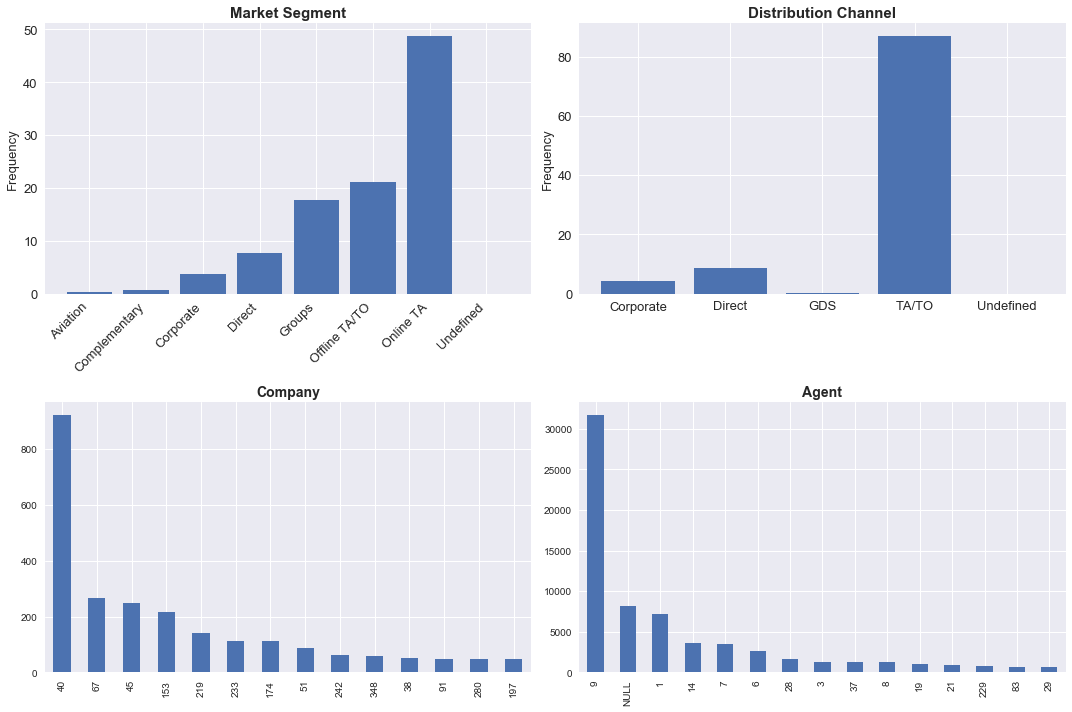

In [11]:
cond = (df['Country'] != 'TMP') & (df['Country'] != 'ATA') & (df['Country'] != 'CN')
df = df[cond]

# Grouping by arrival month.
df_arrivals = df['ArrivalDateMonth'].groupby(df['ArrivalDateMonth']).count()

# Changing 'df_arrival' to datetime.
df_arrivals.index = pd.to_datetime(df_arrivals.index, format='%B')

# Sorting index.
df_arrivals.sort_index(inplace=True)
df_arrivals.index = df_arrivals.index.strftime('%b')

# Creating a new column 'ReservationMonth' using 'ReservationDate'.
df['ReservationMonth'] = [i.month for i in df['ReservationDate']]

# Grouping by reservation month.
df_bookings = df['ReservationMonth'].groupby(df['ReservationMonth']).count()

# Changing 'df_bookings' to datetime.
df_bookings.index = pd.to_datetime(df_bookings.index, format='%m')

# Sorting index.
df_bookings.sort_index(inplace=True)

''' strftime is used to convert date, time and datetime objects to its equivalent string.
    '%b' will give us abbreviated month name. '''
df_bookings.index = df_bookings.index.strftime('%b')

to_name = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',
           9:'September', 10:'October', 11:'November', 12:'December'}

''' map() is used for substituting each value in a Series with another value. '''
df['ReservationMonth'] = df['ReservationMonth'].map(to_name)

fig = plt.figure(figsize=(15,10), dpi=72)

plt.subplot(2,2,1)
v = df['MarketSegment'].value_counts().sort_index()
pmf = v*100 / len(df['MarketSegment'])
plt.bar(v.index, pmf)
plt.grid(zorder=0)
plt.xticks(v.index, fontsize=13, rotation=45, horizontalalignment='right')
plt.yticks(fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Market Segment', fontsize=15, fontweight='bold')

plt.subplot(2,2,2)
v = df['DistributionChannel'].value_counts().sort_index()
pmf = v*100 / len(df['DistributionChannel'])
plt.bar(v.index, pmf)
plt.grid(zorder=0)
plt.xticks(v.index, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution Channel', fontsize=15, fontweight='bold')

plt.subplot(2,2,3) 
df['Company'].value_counts()[1:15].plot(kind='bar')
plt.title('Company', fontsize=14, fontweight='bold')

plt.subplot(2,2,4)
df['Agent'].value_counts()[:15].plot(kind='bar')
plt.title('Agent', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# Replacin NaNs with 'Undefined' in columns ('MarketSegment' & 'DistributionChannel').
df['MarketSegment'].replace('Undefined', np.NaN, inplace=True)
df['DistributionChannel'].replace('Undefined', np.NaN, inplace=True)

df['DepositType'] = df['DepositType'].map(lambda x: x.strip())

# Replacing NaNs with 'Refundable' in column 'DepositType'.
df['DepositType'].replace('Refundable', np.NaN, inplace=True)
cond = (df.Adults == 0) & (df.Children == 0) & (df.Babies == 0)
df['Adults'].mask(cond, inplace=True)
df['Babies'].replace([9,10], np.NaN, inplace=True)
df.dropna(axis=0, inplace=True)
countries_df = pd.read_csv('Country_Code.csv',  index_col='alpha-3')

print('Shape:',countries_df.shape)
countries_df.head()

Shape: (248, 1)


,region
alpha-3,
AFG,Other_Asia
ALA,Other_Europe
ALB,Other_Europe
DZA,Other_Africa
ASM,Other_Oceania


In [13]:
countries_df.loc['PRT'] = 'National'
countries_df.loc['FRA'] = 'France'
countries_df.loc['DEU'] = 'Germany'
countries_df.loc['GBR'] = 'United_Kingdom'
countries_df.loc['ESP'] = 'Spain'
countries_dict = countries_df.to_dict()['region']
df['Country'].replace(countries_dict, inplace=True)

print(df['Country'].value_counts())

National          30851
Other_Europe      14848
France             8790
Germany            6080
United_Kingdom     5306
Spain              4600
Other_Americas     3926
Other_Asia         2802
Other_Africa        940
Other_Oceania       404
Name: Country, dtype: int64


In [14]:
df['PreviousCancellations'] = pd.cut(df['PreviousCancellations'], bins=[-np.inf,0,1,np.inf], labels=['0', '1','2+'])
df['PreviousBookingsNotCanceled'] = pd.cut(df['PreviousBookingsNotCanceled'], bins=[-np.inf,0,1,np.inf], labels=['0','1-2','3+'])
df['RequiredCarParkingSpaces'].where(df.RequiredCarParkingSpaces==0, 1, inplace=True)
df['Babies'].where(df.Babies==0, 1, inplace=True)
df['Children'].where(df.Children==0, 1, inplace=True)

# Filling NaNs with zero in column 'Agent'.
df['Agent'].fillna(0.0, inplace=True)

conv = {0.0:'no_Agent', 9.0:'Agent_A', 1.0:'Agent_B', 14.0:'Agent_C', 7.0:'Agent_D', 6.0:'Agent_E'}
# Replacing using a dictionary.
df['Agent'].replace(conv, inplace=True)
df['Agent'] = df['Agent'].map(lambda x: str(x))

# where() method is used to check a data frame for one or more condition and return the result accordingly.
# Check whether column "Agent" contains word 'Agent'.
df['Agent'].where(df.Agent.str.contains('Agent'), 'other_Agent', inplace=True)

# Filling NaNs with zero in column 'Company'.
df['Company'].fillna(0.0, inplace=True)

conv = {0.0:'no_Company', 40.0:'Company_A'}
df['Company'].replace(conv, inplace=True)
df['Company'] = df['Company'].map(lambda x: str(x))

# Check whether column "Company" contains word 'Company'.
df['Company'].where(df.Company.str.contains('Company'), 'other_Company', inplace=True)
df['ReservedRoomType'] = df['ReservedRoomType'].map(lambda x: x.strip())

df['ReservedRoomType'].where((df.ReservedRoomType=='A') | (df.ReservedRoomType=='D'), 'Other', inplace=True)

# cut() function is used to separate the array elements into different bins .
df['TotalOfSpecialRequests'] = pd.cut(df['TotalOfSpecialRequests'], bins=[-np.inf,0,1,np.inf], labels=['0', '1','2+'])
df['BookingChanges'] = pd.cut(df['BookingChanges'], bins=[-np.inf,0,1,np.inf], labels=['0', '1','2+'])
df['StaysInWeekendNights'] = pd.cut(df['StaysInWeekendNights'], bins=[-np.inf,0,1,2,np.inf], labels=['0','1','2','3+'])
df['StaysInWeekNights'] = pd.cut(df['StaysInWeekNights'], bins=[-np.inf,0,1,2,3,4,5,np.inf], labels=['0','1','2','3','4','5','6+'])

# Changing data type of "DaysInWaitingList" to 'float64'.
df['DaysInWaitingList'] = df['DaysInWaitingList'].astype('float64')
cat_cols = df.select_dtypes(exclude='float64').columns

# Changing columns to category type.
df[cat_cols] = df[cat_cols].astype('category')
df['Adults'] = df['Adults'].astype('category')
df['Children'] = df['Children'].astype('category')
df['Babies'] = df['Babies'].astype('category')
df['Country'] = df['Country'].astype('category')

# Dropping columns that are not useful.
to_drop = ['ReservationDate', 'ReservationStatusDate', 'CheckOutDate', 'ArrivalDate', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'ArrivalDateYear', 'AssignedRoomType']
df_copy = df.drop(to_drop, axis=1)

''' Qcut (quantile-cut) differs from cut in the sense that, in qcut, the number of elements in each bin
    will be roughly the same, but this will come at the cost of differently sized interval widths.
    On the other hand, in cut, the bin edges were equal sized (when we specified bins) with uneven
    number of elements in each bin or group. Also, cut is useful when you know for sure the interval
    ranges and the bins, '''
df_copy['LeadTime'] = pd.qcut(df['LeadTime'], 10)
df_copy['ADR'] = pd.qcut(df['ADR'], 10)
df_copy['TotalStay'] = pd.cut(df['TotalStay'], bins=[0,1,2,3,4,5,6,7,8,np.inf], labels=['0','1','2','3','4','5','6','7','8+'])
df_copy['DaysInWaitingList'].where(df_copy.DaysInWaitingList==0, 1, inplace=True)

df_copy['DaysInWaitingList'] = df_copy['DaysInWaitingList'].astype('category')

# Dropping 'IsCanceled'.
df.drop('IsCanceled', axis=1, inplace=True)
cat_cols = df.select_dtypes(exclude='float64').columns

# Changing some columns to category type.
df[cat_cols] = df[cat_cols].astype('category')
df['Adults'] = df['Adults'].astype('category')
df['Children'] = df['Children'].astype('category')
df['Babies'] = df['Babies'].astype('category')

# Dropping columns that are not useful.
to_drop = ['ReservationDate', 'ReservationStatusDate', 'CheckOutDate', 'ArrivalDate', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'ArrivalDateYear', 'AssignedRoomType', 'DaysInWaitingList', 'TotalStay']
df.drop(to_drop, axis=1, inplace=True)

# Independent variables.
X = df.drop(['ArrivalDateMonth'], axis=1)

# Dependent variable.
y = df['ArrivalDateMonth']

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45)
split = sss.split(X, y)

for train_index, test_index in split:
    sample_df = df.iloc[test_index]

# Encoding.
encoded_df = pd.get_dummies(sample_df, drop_first=True)
encoded_df.shape

(15710, 80)

**StratifiedShuffleSplit** is a combination of both ShuffleSplit and StratifiedKFold.

The major difference between **StratifiedShuffleSplit** and **StratifiedKFold** (shuffle=True) is that in **StratifiedKFold**, the dataset is shuffled only once in the beginning and then split into the specified number of folds. This discards any chances of overlapping of the train-test sets. 

In **StratifiedShuffleSplit** the data is shuffled each time before the split is done and this is why there’s a greater chance that overlapping might be possible between train-test sets. 

### Standard Scaler

**StandardScaler** follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(encoded_df)
scaled = scaler.transform(encoded_df)
df_scaled = pd.DataFrame(scaled, columns=encoded_df.columns)
df_scaled.head(10)

,LeadTime,ADR,ArrivalDateMonth_August,ArrivalDateMonth_December,ArrivalDateMonth_February,ArrivalDateMonth_January,ArrivalDateMonth_July,ArrivalDateMonth_June,ArrivalDateMonth_March,ArrivalDateMonth_May,...,ReservationMonth_December,ReservationMonth_February,ReservationMonth_January,ReservationMonth_July,ReservationMonth_June,ReservationMonth_March,ReservationMonth_May,ReservationMonth_November,ReservationMonth_October,ReservationMonth_September
0,-0.070071,0.124398,-0.357239,4.258544,-0.258917,-0.222963,-0.335686,-0.332862,-0.297325,-0.339896,...,-0.301365,-0.358936,-0.397545,-0.30872,-0.213357,-0.296055,-0.262814,-0.289391,-0.340129,3.732755
1,-0.920227,-0.267071,-0.357239,-0.234822,-0.258917,-0.222963,-0.335686,-0.332862,-0.297325,-0.339896,...,-0.301365,-0.358936,-0.397545,-0.30872,-0.213357,3.377745,-0.262814,-0.289391,-0.340129,-0.267899
2,0.988102,0.370917,-0.357239,-0.234822,-0.258917,-0.222963,-0.335686,-0.332862,-0.297325,-0.339896,...,-0.301365,2.786010,-0.397545,-0.30872,-0.213357,-0.296055,-0.262814,-0.289391,-0.340129,-0.267899
3,-0.730299,-0.741224,-0.357239,-0.234822,-0.258917,4.485041,-0.335686,-0.332862,-0.297325,-0.339896,...,3.318238,-0.358936,-0.397545,-0.30872,-0.213357,-0.296055,-0.262814,-0.289391,-0.340129,-0.267899
4,0.608245,-0.420188,-0.357239,-0.234822,-0.258917,-0.222963,2.978975,-0.332862,-0.297325,-0.339896,...,-0.301365,-0.358936,2.515437,-0.30872,-0.213357,-0.296055,-0.262814,-0.289391,-0.340129,-0.267899
5,-0.522282,-0.649864,-0.357239,-0.234822,-0.258917,-0.222963,-0.335686,-0.332862,3.363319,-0.339896,...,-0.301365,-0.358936,2.515437,-0.30872,-0.213357,-0.296055,-0.262814,-0.289391,-0.340129,-0.267899
6,-0.847874,2.412479,-0.357239,-0.234822,-0.258917,-0.222963,-0.335686,3.004251,-0.297325,-0.339896,...,-0.301365,-0.358936,-0.397545,-0.30872,4.686986,-0.296055,-0.262814,-0.289391,-0.340129,-0.267899
7,0.047504,-0.905059,-0.357239,-0.234822,-0.258917,-0.222963,-0.335686,-0.332862,3.363319,-0.339896,...,-0.301365,-0.358936,-0.397545,-0.30872,-0.213357,-0.296055,-0.262814,3.455531,-0.340129,-0.267899
8,-0.621768,-2.691426,-0.357239,-0.234822,-0.258917,-0.222963,-0.335686,-0.332862,3.363319,-0.339896,...,-0.301365,2.786010,-0.397545,-0.30872,-0.213357,-0.296055,-0.262814,-0.289391,-0.340129,-0.267899
9,-0.784564,-0.420188,-0.357239,-0.234822,-0.258917,-0.222963,-0.335686,-0.332862,-0.297325,-0.339896,...,-0.301365,-0.358936,-0.397545,-0.30872,-0.213357,-0.296055,-0.262814,-0.289391,-0.340129,-0.267899


In [16]:
sample_df.head()

,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,...,Agent,Company,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ChangedRoom,StayChanges,ReservationMonth
21703,102.0,December,1,3,2.0,0.0,0.0,BB,Spain,Online TA,...,other_Agent,other_Company,Transient-Party,110.34,0,0,Canceled,0,No Changes,September
46504,8.0,April,0,1,1.0,0.0,0.0,BB,National,Online TA,...,other_Agent,other_Company,Transient,95.00,0,1,Check-Out,0,No Changes,March
17655,219.0,September,1,2,2.0,0.0,0.0,BB,National,Groups,...,other_Agent,other_Company,Transient,120.00,0,0,Canceled,0,No Changes,February
22543,29.0,January,2,5,2.0,0.0,0.0,SC,National,Online TA,...,other_Agent,other_Company,Transient,76.42,0,1,Canceled,0,No Changes,December
76992,177.0,July,0,2,2.0,0.0,0.0,BB,United_Kingdom,Offline TA/TO,...,other_Agent,other_Company,Transient,89.00,0,1,Check-Out,0,No Changes,January


### Elbow Method

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The **Elbow Method** is one of the most popular methods to determine this optimal value of k.

**WHY PCA?**

- When there are many input attributes, it is difficult to visualize the data. There is a very famous term ‘Curse of dimensionality’ in the machine learning domain.
- Basically, it refers to the fact that a higher number of attributes in a dataset adversely affects the accuracy and training time of the machine learning model.
- Principal Component Analysis (PCA) is a way to address this issue and is used for better data visualization and improving accuracy.

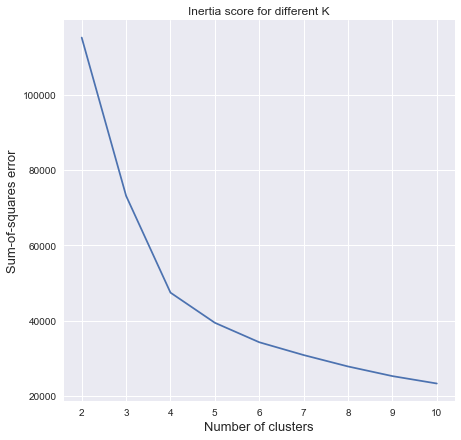

In [17]:
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
x_cols = df_scaled.to_numpy()
pca = PCA()
pca.fit(x_cols)
explained_variance = pca.explained_variance_
pca = PCA(n_components=3)
x_3cols = pca.fit_transform(x_cols)
iner = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i).fit(x_3cols)
    iner.append(kmeans.inertia_)

# Elbow Method.
xs = np.arange(2, 11, 1)
fig, ax1 = plt.subplots(figsize=(7,7))
ax1.plot(xs, iner)
ax1.set_title('Inertia score for different K')
ax1.set_xlabel('Number of clusters', fontsize=13)
ax1.set_xticks([2,3,4,5,6,7,8,9,10])
ax1.set_ylabel('Sum-of-squares error', fontsize=13)
plt.show()

### k-Means

**Silhouette** refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The Silhouette coefficient for the K-Means Clustering algorithm is 0.51


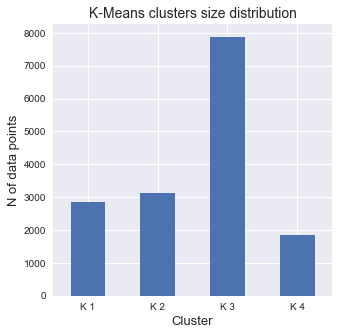

In [20]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(x_3cols)
labels_km = kmeans.predict(x_3cols)
silhouette_km = silhouette_score(x_3cols, labels_km)

print('The Silhouette coefficient for the K-Means Clustering algorithm is '+str(round(silhouette_km, 2)))

kmeans_df = pd.DataFrame(labels_km, columns=['cluster_id'])

fig = plt.figure(figsize=(5, 5))
kmeans_df.value_counts().sort_index().plot.bar()
plt.xlabel('Cluster', fontsize=13)
plt.title('K-Means clusters size distribution', fontsize=14)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2,3], labels=['K 1','K 2','K 3','K 4'], rotation=0)
plt.show()

### MeanShift

Estimated bandwidth: 3.02
Clusters detected by MeanShift algorithm: 3
Silhouette coefficient: 0.38


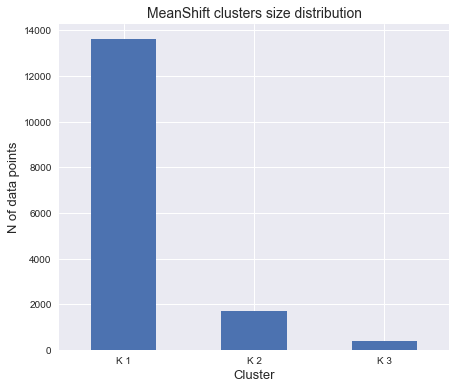

In [21]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(x_3cols, quantile=0.3, n_jobs=-1)
ms_labels = MeanShift(bandwidth=bandwidth).fit_predict(x_3cols)

silhouette_ms = silhouette_score(x_3cols, ms_labels)
n_clusters_ = len(set(ms_labels))
meansh_df = pd.DataFrame(ms_labels, columns=['cluster_id'])

print('Estimated bandwidth: '+str(round(bandwidth, 2)))
print('Clusters detected by MeanShift algorithm: '+str(n_clusters_))
print('Silhouette coefficient: '+str(round(silhouette_ms, 2)))

meansh_df.value_counts().sort_index().plot.bar(figsize=(7, 6))
plt.title('MeanShift clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2], labels=['K 1','K 2','K 3'], rotation=0)
plt.show()

### DBSCAN

Clusters detected by DBSCAN algorithm 3
Silhouette coefficient: 0.2


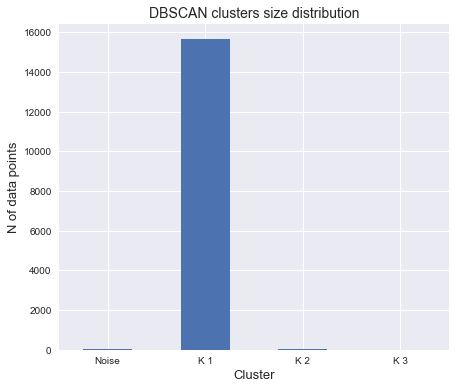

In [22]:
from sklearn.cluster import DBSCAN
db_labels = DBSCAN(eps=1).fit_predict(x_3cols)
silhouette_db = silhouette_score(x_3cols, db_labels)
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
dbscan_df = pd.DataFrame(db_labels, columns=['cluster_id'])

print('Clusters detected by DBSCAN algorithm '+str(n_clusters_))
print('Silhouette coefficient: '+str(round(silhouette_db, 2)))

dbscan_df.value_counts().sort_index().plot.bar(figsize=(7, 6))
plt.title('DBSCAN clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=range(0,(n_clusters_+1)), labels=['Noise','K 1','K 2','K 3','K 4'], rotation=0)
plt.show()

### Agglomerative Clustering

The Silhouette coefficient for Agglomerative Hierarchical Clustering algorithm: 0.5


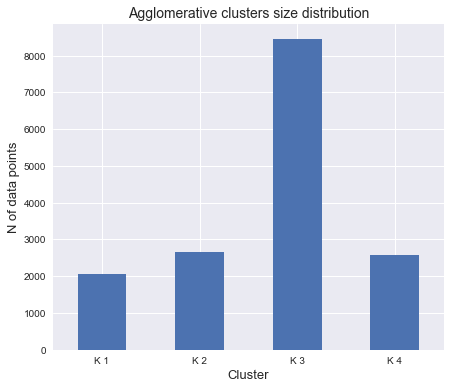

In [23]:
from sklearn.cluster import AgglomerativeClustering
ac_labels = AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(x_3cols)
silhouette_ac = silhouette_score(x_3cols, ac_labels)
agglo_df = pd.DataFrame(ac_labels, columns=['cluster_id'])

print('The Silhouette coefficient for Agglomerative Hierarchical Clustering algorithm: '+str(round(silhouette_ac, 2)))

agglo_df.value_counts().sort_index().plot.bar(figsize=(7, 6))
plt.title('Agglomerative clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2,3], labels=['K 1','K 2','K 3','K 4'], rotation=0)
plt.show()

### Gaussian Mixture

The Silhouette coefficient for EM Clustering algorithm: 0.49


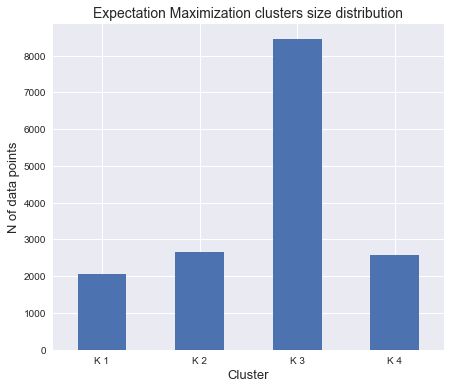

In [24]:
from sklearn.mixture import GaussianMixture
gm_labels = GaussianMixture(n_components=4, covariance_type='full').fit_predict(x_3cols)
silhouette_gm = silhouette_score(x_3cols, gm_labels)
gaussmix_df = pd.DataFrame(gm_labels, columns=['cluster_id'])

print('The Silhouette coefficient for EM Clustering algorithm: '+str(round(silhouette_gm, 2)))

agglo_df.value_counts().sort_index().plot.bar(figsize=(7, 6))
plt.title('Expectation Maximization clusters size distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=13)
plt.ylabel('N of data points', fontsize=13)
plt.xticks(ticks=[0,1,2,3], labels=['K 1','K 2','K 3','K 4'], rotation=0)
plt.show()

In [25]:
print("k-means Silhouette Score:", silhouette_km)
print("Agglomerative Silhouette Score:", silhouette_ac)
print("DBSCAN Silhouette Score:", silhouette_db)
print("Mean-Shift Silhouette Score:", silhouette_ms)
print("Expectation Maximization Silhouette Score:", silhouette_gm)

k-means Silhouette Score: 0.5097775228316092
Agglomerative Silhouette Score: 0.5041093343261741
DBSCAN Silhouette Score: 0.1955764580338745
Mean-Shift Silhouette Score: 0.38473078892628854
Expectation Maximization Silhouette Score: 0.4896459342609206


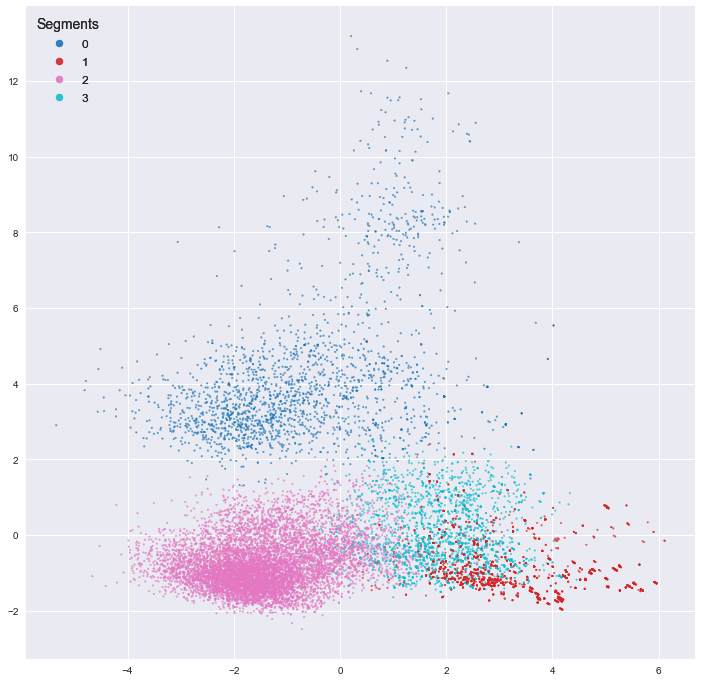

In [26]:
pca = PCA(n_components=2)
x_new = pca.fit_transform(x_cols)
pca_df = pd.DataFrame(x_new, columns=['x', 'y'])
customer_seg = agglo_df.join(pca_df)
fig, ax = plt.subplots(figsize=(12, 12))
scatter = ax.scatter('x', 'y', c='cluster_id', data=customer_seg, alpha=0.7, s=3, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="Segments", fontsize=12, title_fontsize=14)
ax.add_artist(legend)
plt.show()

### The four clusters.

In [30]:
sample_df.reset_index(inplace=True)
sample_df.drop(['index'], axis=1, inplace=True)
sample_df_cat_labeled = sample_df.select_dtypes(exclude='float64').join(agglo_df)
sample_df_num_labeled = sample_df.select_dtypes(include='float64').join(agglo_df)
segments_df_cat = sample_df_cat_labeled.groupby(by='cluster_id').agg(lambda x:x.value_counts().index[0])
segments_df_num = sample_df_num_labeled.groupby(by='cluster_id').median()
segments_df = pd.concat([segments_df_cat, segments_df_num], axis='columns')
segments_df.T

cluster_id,0,1,2,3
ArrivalDateMonth,August,June,August,September
StaysInWeekendNights,0,0,0,0
StaysInWeekNights,1,2,2,2
Adults,2.0,2.0,2.0,2.0
Children,0.0,0.0,0.0,0.0
Babies,0.0,0.0,0.0,0.0
Meal,BB,BB,BB,BB
Country,National,National,Other_Europe,National
MarketSegment,Direct,Groups,Online TA,Offline TA/TO
DistributionChannel,Direct,TA/TO,TA/TO,TA/TO
